<a href="https://colab.research.google.com/github/mmsamiei/lets-pytorch/blob/master/Q7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
CUDA = True
BATCH_SIZE = 64

In [0]:
# Define Train loader
train_tensors = (original_train_dataset.data.float() / 255)
test_tensors = (original_test_dataset.data.float() / 255)

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, stride = 2)
        self.conv1_bn = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, 3, stride = 2)
        self.conv2_bn = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, stride = 2)
        self.conv3_bn = nn.BatchNorm2d(32)
        self.lrelu = nn.LeakyReLU(0.2)
        self.lin = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        temp = x.view(-1, 1, 28, 28)
        temp = self.conv1(temp)
        temp = self.conv1_bn(temp)
        temp = self.lrelu(temp)
        temp = self.conv2(temp)
        temp = self.conv2_bn(temp)
        temp = self.lrelu(temp)
        temp = self.conv3(temp)
        temp = self.conv3_bn(temp)
        temp = self.lrelu(temp)
        temp = temp.view(-1, 128)
        temp = self.lin(temp)
        out = self.sigmoid(temp)
        return out

In [0]:
import torch.nn.functional as F

class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.deconv1 = nn.ConvTranspose2d(100, 128, 5)
    self.deconv1_bn = nn.BatchNorm2d(128)
    self.droput1 = nn.Dropout2d(p=0.5)
    self.deconv2 = nn.ConvTranspose2d(128, 64, 5)
    self.deconv2_bn = nn.BatchNorm2d(64)
    self.droput2 = nn.Dropout2d(p=0.5)
    self.deconv3 = nn.ConvTranspose2d(64, 32, 5,2)
    self.deconv3_bn = nn.BatchNorm2d(32)
    self.deconv4 = nn.ConvTranspose2d(32, 16, 5)
    self.deconv4_bn = nn.BatchNorm2d(16)
    self.deconv5 = nn.ConvTranspose2d(16, 1, 4) 
    self.lrelu = nn.LeakyReLU(0.2)
    
  # x must be 100
  def forward(self, x):
    temp = x.view(-1, 100, 1, 1)
    temp = self.deconv1(temp)
    #temp = self.deconv1_bn(temp)
    temp = self.lrelu(temp)
    #temp = self.droput1(temp)
    temp = self.deconv2(temp)
    temp = self.deconv2_bn(temp)
    temp = self.lrelu(temp)
    #temp = self.droput2(temp)
    temp = self.deconv3(temp)
    #temp = self.deconv3_bn(temp)
    temp = self.lrelu(temp)
    temp = self.deconv4(temp)
    #temp = self.deconv4_bn(temp)
    temp = self.lrelu(temp)
    temp = self.deconv5(temp)
    temp = F.tanh(temp)
    return temp

In [0]:
discriminator = Discriminator()
generator = Generator()

In [254]:
testi = torch.randn(10, 100)
temp = generator(testi)
#temp = discriminator(temp)
temp.shape

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.Size([10, 1, 28, 28])

In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002


opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 3) # set default size of plots

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch: 0 	 last batch loss D: 1.0706400871276855 	 last batch loss G: 1.0145752429962158


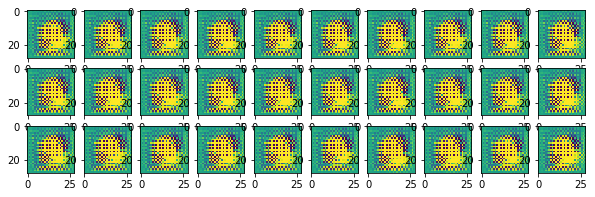

epoch: 1 	 last batch loss D: 1.0807809829711914 	 last batch loss G: 0.9695343971252441


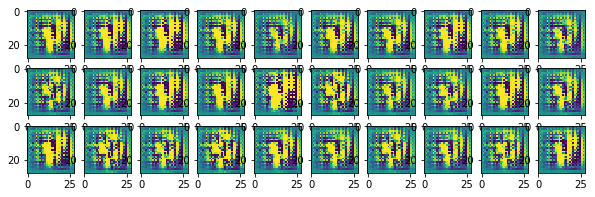

epoch: 2 	 last batch loss D: 1.3353277444839478 	 last batch loss G: 0.9853709936141968


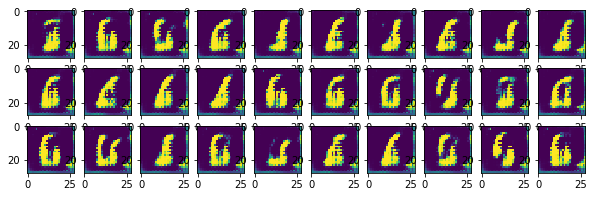

epoch: 3 	 last batch loss D: 1.2458504438400269 	 last batch loss G: 0.8752466440200806


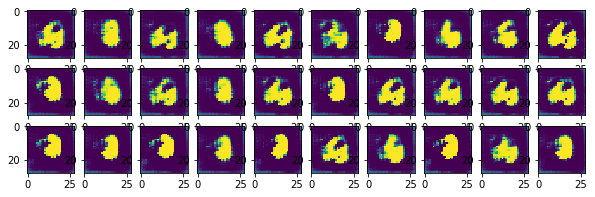

epoch: 4 	 last batch loss D: 1.368566870689392 	 last batch loss G: 0.8708509802818298


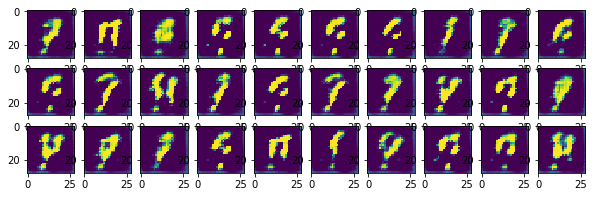

epoch: 5 	 last batch loss D: 1.4608006477355957 	 last batch loss G: 0.7562351226806641


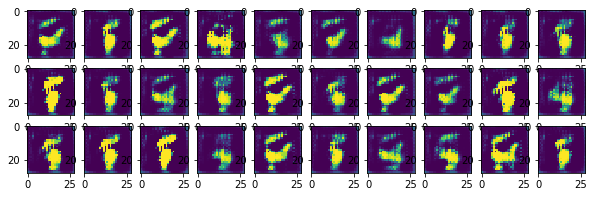

epoch: 6 	 last batch loss D: 1.211114525794983 	 last batch loss G: 0.852737307548523


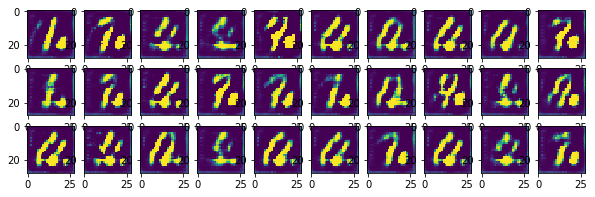

epoch: 7 	 last batch loss D: 1.2970893383026123 	 last batch loss G: 0.8199790716171265


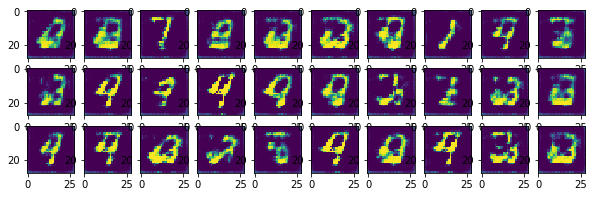

epoch: 8 	 last batch loss D: 1.2120440006256104 	 last batch loss G: 0.9619894027709961


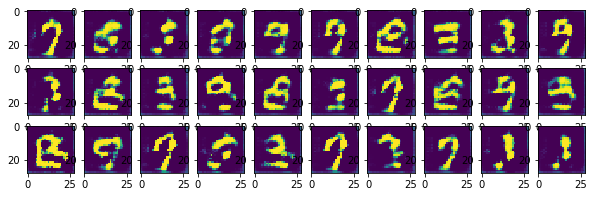

epoch: 9 	 last batch loss D: 1.190548062324524 	 last batch loss G: 0.8373976945877075


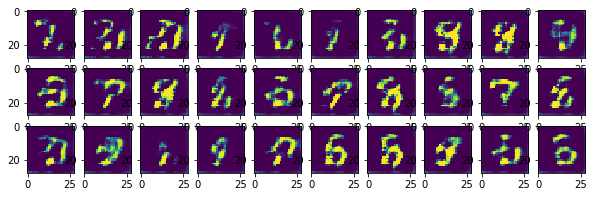

epoch: 10 	 last batch loss D: 1.4598031044006348 	 last batch loss G: 1.1466732025146484


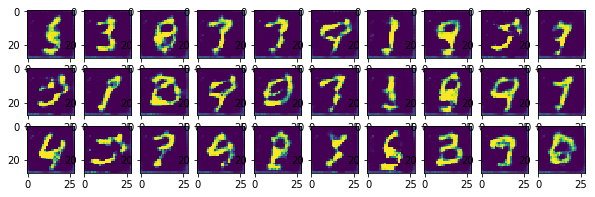

epoch: 11 	 last batch loss D: 1.4031314849853516 	 last batch loss G: 0.7339128255844116


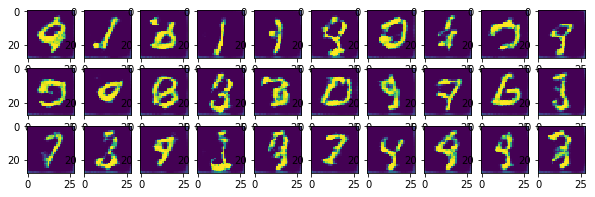

epoch: 12 	 last batch loss D: 1.3839192390441895 	 last batch loss G: 0.6648030281066895


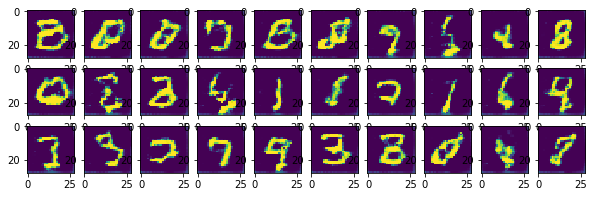

epoch: 13 	 last batch loss D: 1.3093130588531494 	 last batch loss G: 0.7828821539878845


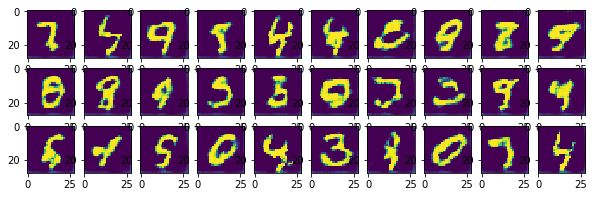

epoch: 14 	 last batch loss D: 1.250281572341919 	 last batch loss G: 0.7272658944129944


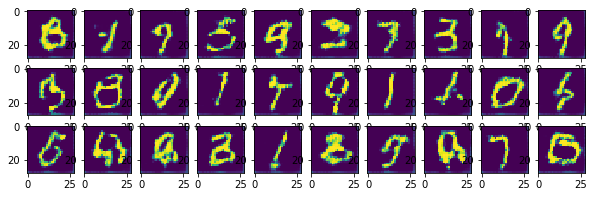

epoch: 15 	 last batch loss D: 1.385597825050354 	 last batch loss G: 0.7710932493209839


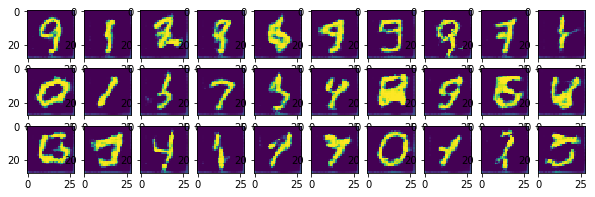

epoch: 16 	 last batch loss D: 1.389439344406128 	 last batch loss G: 0.750141978263855


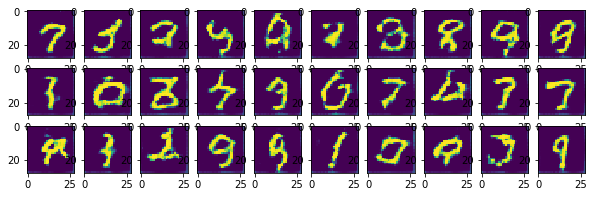

epoch: 17 	 last batch loss D: 1.3896336555480957 	 last batch loss G: 0.737964928150177


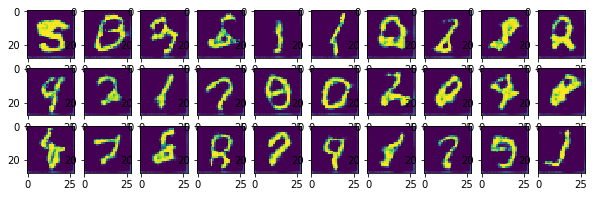

epoch: 18 	 last batch loss D: 1.3804079294204712 	 last batch loss G: 0.7045779228210449


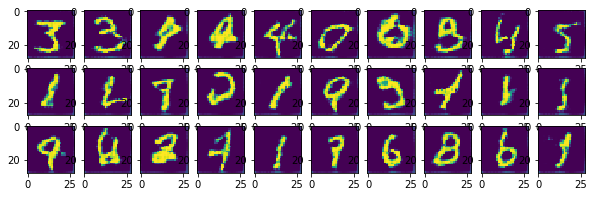

epoch: 19 	 last batch loss D: 1.4032292366027832 	 last batch loss G: 0.6716783046722412


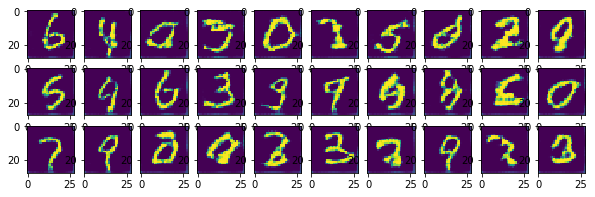

epoch: 20 	 last batch loss D: 1.4528639316558838 	 last batch loss G: 0.722093939781189


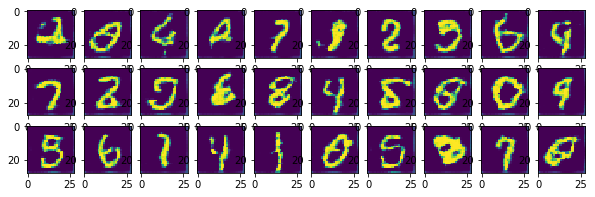

epoch: 21 	 last batch loss D: 1.3765275478363037 	 last batch loss G: 0.7080631256103516


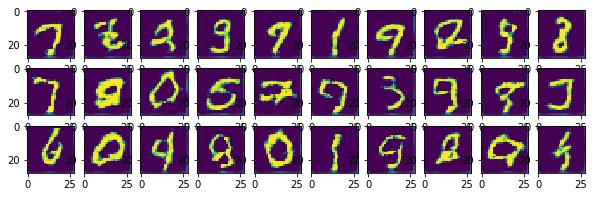

epoch: 22 	 last batch loss D: 1.3878891468048096 	 last batch loss G: 0.6992159485816956


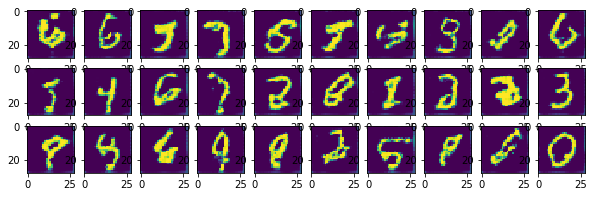

epoch: 23 	 last batch loss D: 1.4265062808990479 	 last batch loss G: 0.6906574964523315


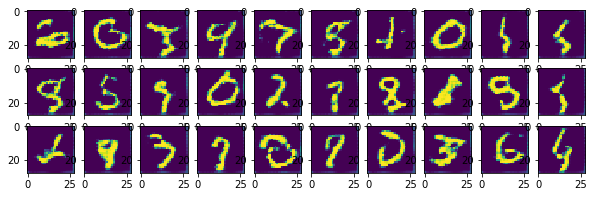

epoch: 24 	 last batch loss D: 1.406158208847046 	 last batch loss G: 0.7021175026893616


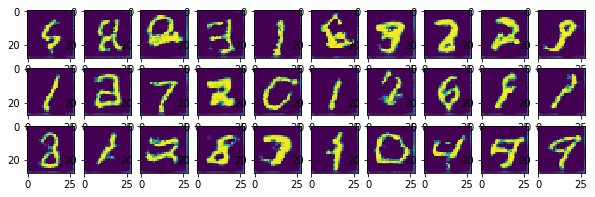

epoch: 25 	 last batch loss D: 1.402256965637207 	 last batch loss G: 0.7478420734405518


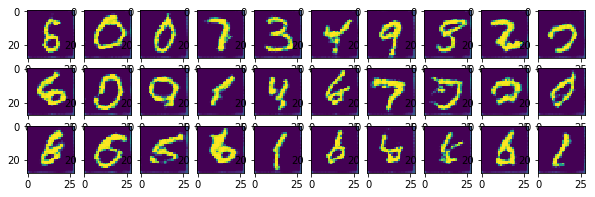

epoch: 26 	 last batch loss D: 1.392683982849121 	 last batch loss G: 0.6867008209228516


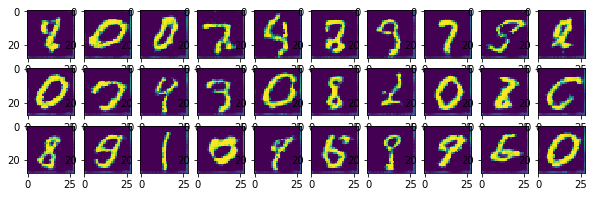

epoch: 27 	 last batch loss D: 1.3762993812561035 	 last batch loss G: 0.6898963451385498


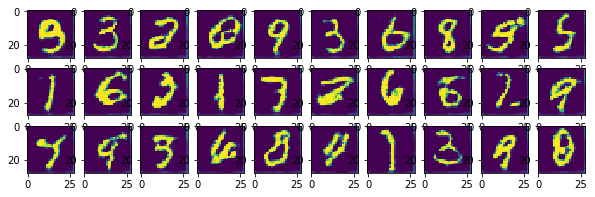

epoch: 28 	 last batch loss D: 1.399357557296753 	 last batch loss G: 0.7053737044334412


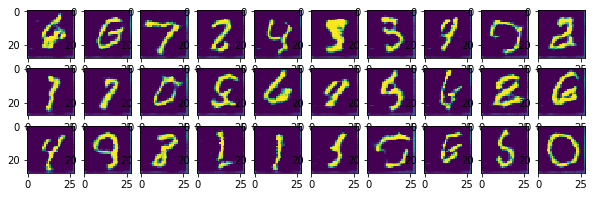

epoch: 29 	 last batch loss D: 1.3871164321899414 	 last batch loss G: 0.6700258255004883


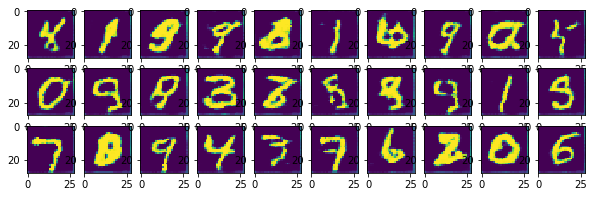

epoch: 30 	 last batch loss D: 1.3778643608093262 	 last batch loss G: 0.6977964639663696


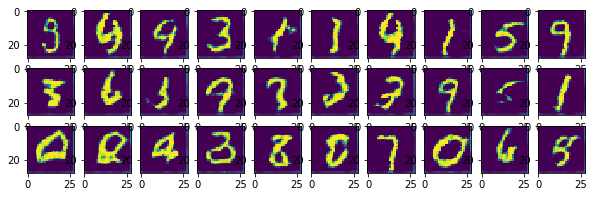

epoch: 31 	 last batch loss D: 1.376238465309143 	 last batch loss G: 0.7045580148696899


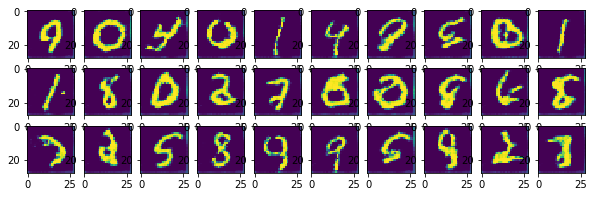

epoch: 32 	 last batch loss D: 1.4041075706481934 	 last batch loss G: 0.7198915481567383


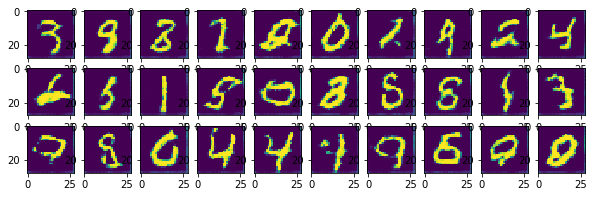

epoch: 33 	 last batch loss D: 1.3821048736572266 	 last batch loss G: 0.6956417560577393


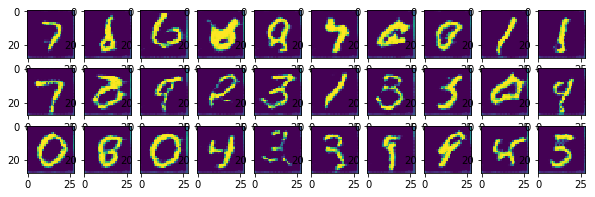

epoch: 34 	 last batch loss D: 1.2215642929077148 	 last batch loss G: 0.7922465801239014


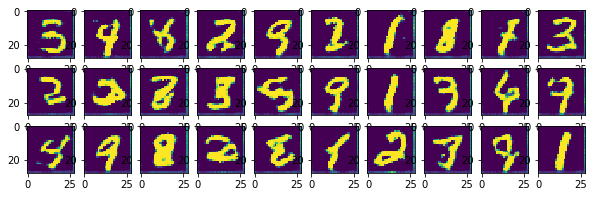

epoch: 35 	 last batch loss D: 1.3891675472259521 	 last batch loss G: 0.6694273948669434


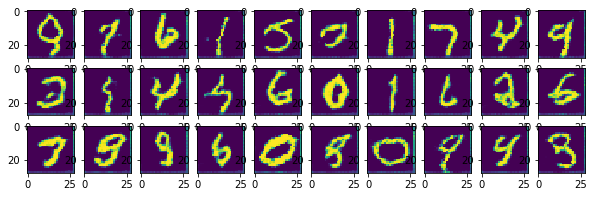

epoch: 36 	 last batch loss D: 1.380871295928955 	 last batch loss G: 0.687564492225647


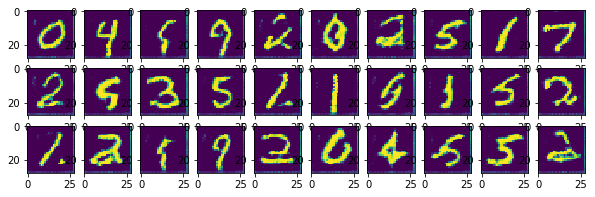

epoch: 37 	 last batch loss D: 1.4047822952270508 	 last batch loss G: 0.6649210453033447


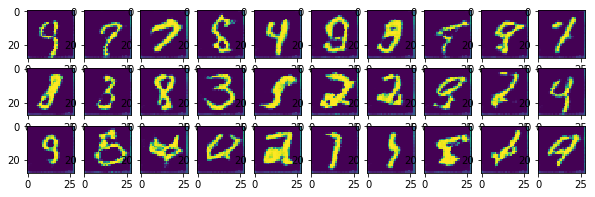

epoch: 38 	 last batch loss D: 1.406784176826477 	 last batch loss G: 0.6891359090805054


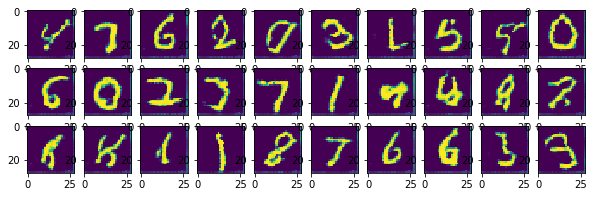

epoch: 39 	 last batch loss D: 1.3848111629486084 	 last batch loss G: 0.6849225759506226


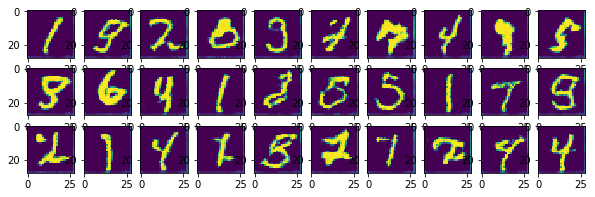

epoch: 40 	 last batch loss D: 1.3711631298065186 	 last batch loss G: 0.6898232698440552


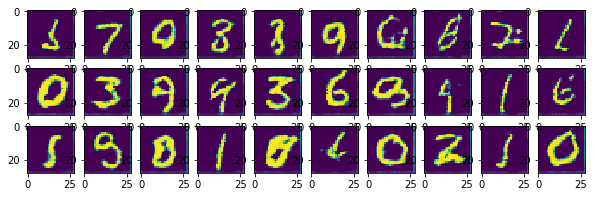

epoch: 41 	 last batch loss D: 1.3913979530334473 	 last batch loss G: 0.6948614716529846


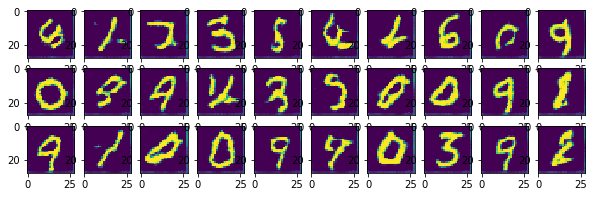

epoch: 42 	 last batch loss D: 1.388777732849121 	 last batch loss G: 0.71041339635849


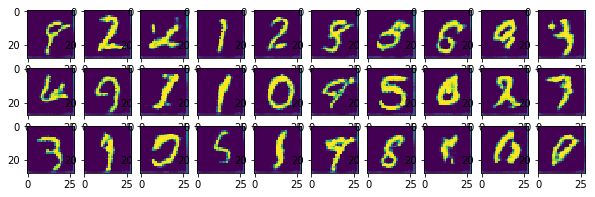

epoch: 43 	 last batch loss D: 1.4601598978042603 	 last batch loss G: 0.6227114796638489


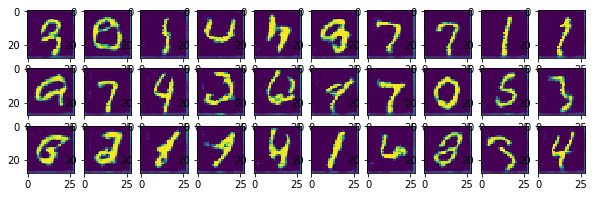

epoch: 44 	 last batch loss D: 1.376962661743164 	 last batch loss G: 0.6842690706253052


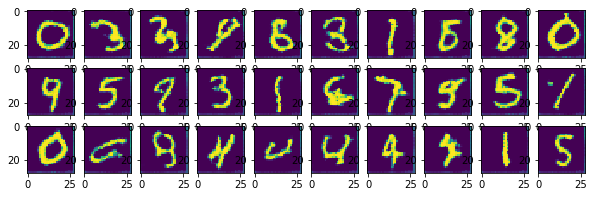

epoch: 45 	 last batch loss D: 1.400888204574585 	 last batch loss G: 0.6948004961013794


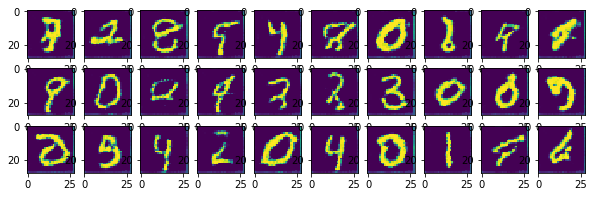

epoch: 46 	 last batch loss D: 1.3827924728393555 	 last batch loss G: 0.6948409080505371


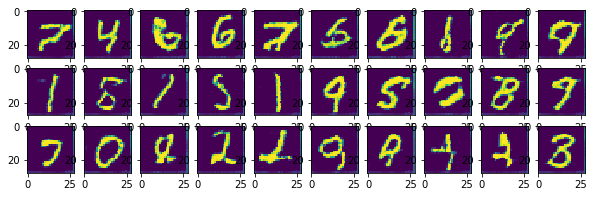

epoch: 47 	 last batch loss D: 1.3867850303649902 	 last batch loss G: 0.6604746580123901


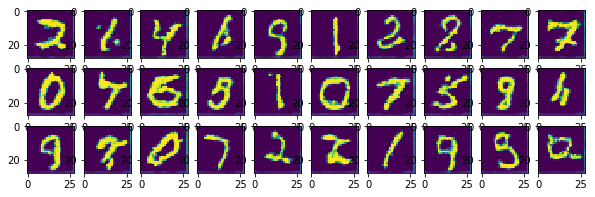

epoch: 48 	 last batch loss D: 1.4172500371932983 	 last batch loss G: 0.6784474849700928


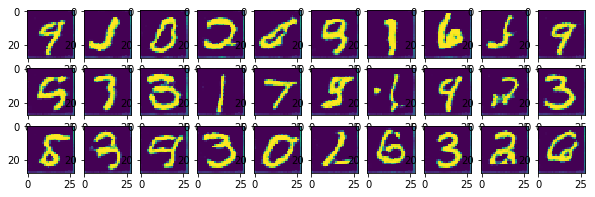

epoch: 49 	 last batch loss D: 1.3968076705932617 	 last batch loss G: 0.6749234199523926


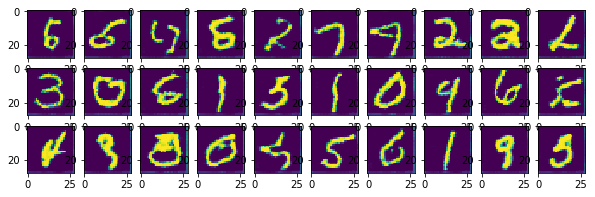

epoch: 50 	 last batch loss D: 1.377997636795044 	 last batch loss G: 0.7003358006477356


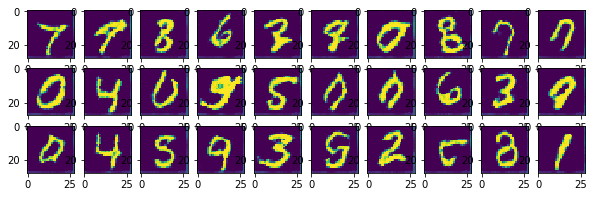

epoch: 51 	 last batch loss D: 1.3968708515167236 	 last batch loss G: 0.681310772895813


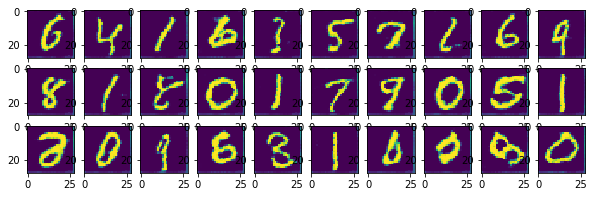

epoch: 52 	 last batch loss D: 1.294311285018921 	 last batch loss G: 0.7991431951522827


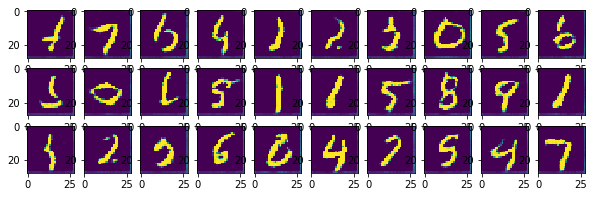

epoch: 53 	 last batch loss D: 1.3819935321807861 	 last batch loss G: 0.6899964809417725


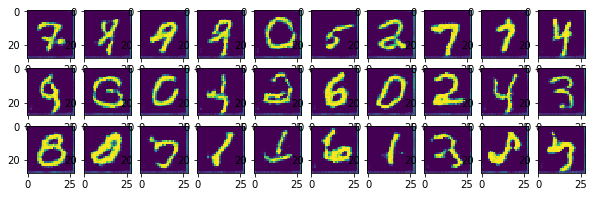

epoch: 54 	 last batch loss D: 1.3901314735412598 	 last batch loss G: 0.6934362053871155


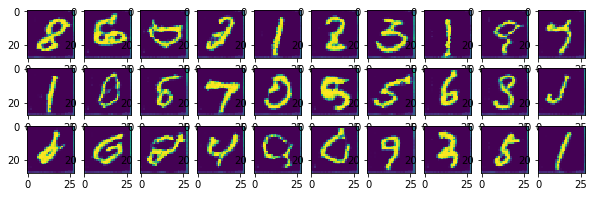

epoch: 55 	 last batch loss D: 1.3802952766418457 	 last batch loss G: 0.7084619402885437


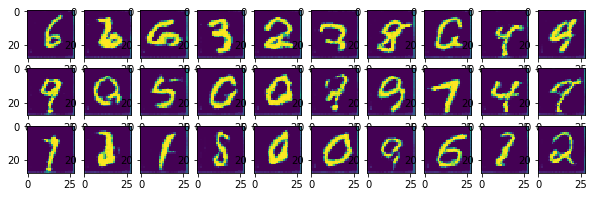

epoch: 56 	 last batch loss D: 1.391031265258789 	 last batch loss G: 0.7130316495895386


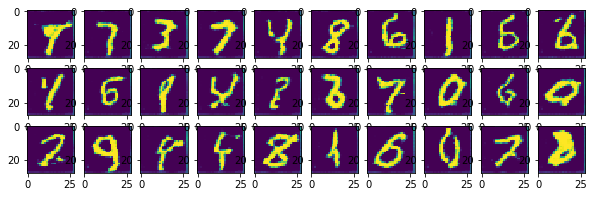

epoch: 57 	 last batch loss D: 1.3796930313110352 	 last batch loss G: 0.6991769075393677


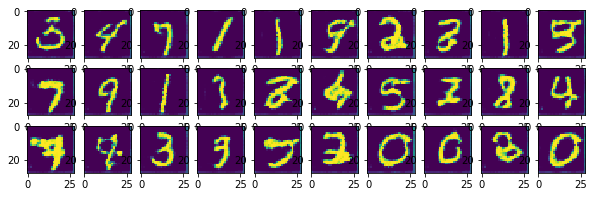

epoch: 58 	 last batch loss D: 1.3857083320617676 	 last batch loss G: 0.6990731954574585


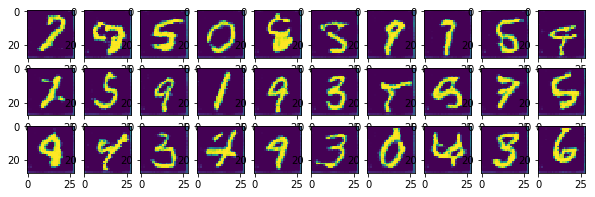

epoch: 59 	 last batch loss D: 1.398013949394226 	 last batch loss G: 0.6860917210578918


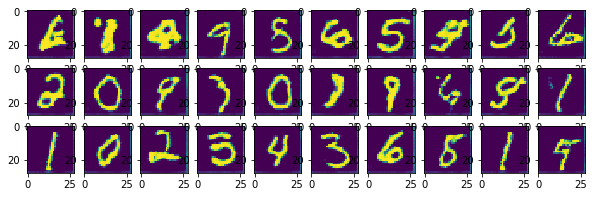

epoch: 60 	 last batch loss D: 1.3613402843475342 	 last batch loss G: 0.7155448198318481


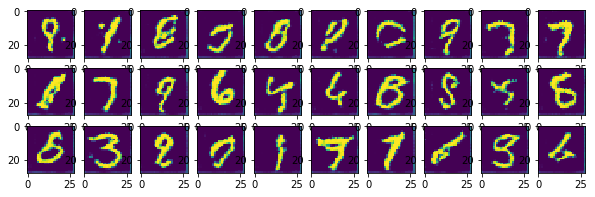

epoch: 61 	 last batch loss D: 1.3933969736099243 	 last batch loss G: 0.7096534967422485


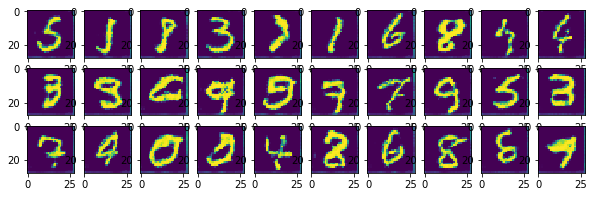

epoch: 62 	 last batch loss D: 1.389479160308838 	 last batch loss G: 0.6916893124580383


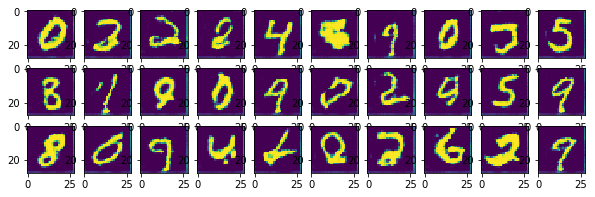

epoch: 63 	 last batch loss D: 1.3953306674957275 	 last batch loss G: 0.6801307797431946


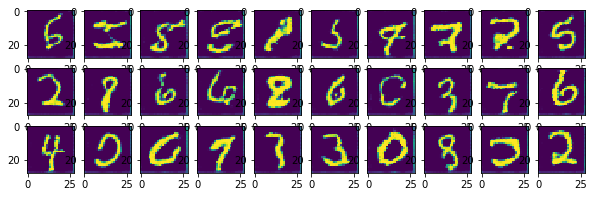

epoch: 64 	 last batch loss D: 1.397122859954834 	 last batch loss G: 0.7081179022789001


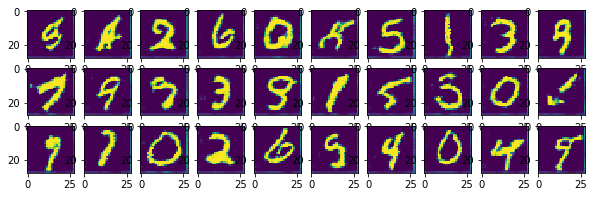

epoch: 65 	 last batch loss D: 1.3383142948150635 	 last batch loss G: 0.7556010484695435


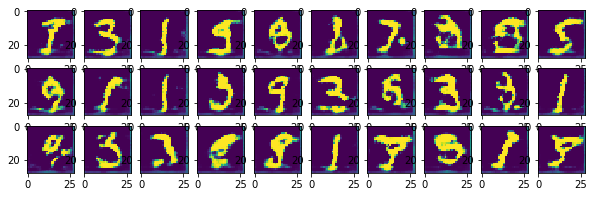

epoch: 66 	 last batch loss D: 1.39878249168396 	 last batch loss G: 0.7280980348587036


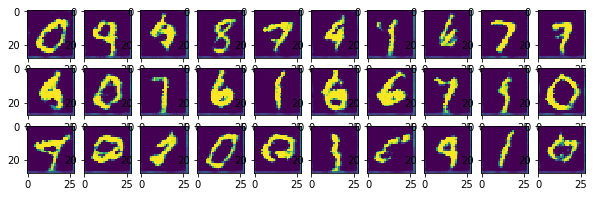

epoch: 67 	 last batch loss D: 1.37495756149292 	 last batch loss G: 0.7078313827514648


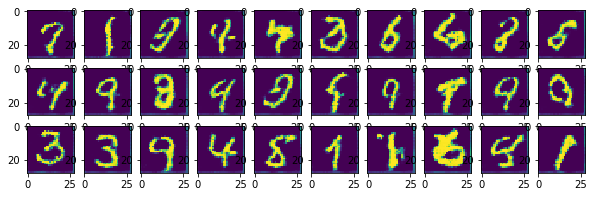

epoch: 68 	 last batch loss D: 1.3998496532440186 	 last batch loss G: 0.695013701915741


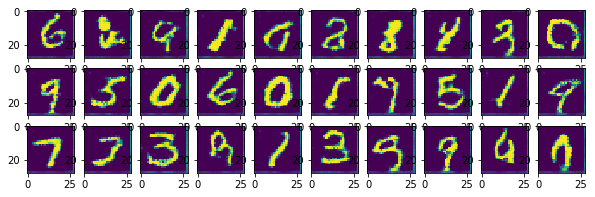

epoch: 69 	 last batch loss D: 1.391422152519226 	 last batch loss G: 0.6879000663757324


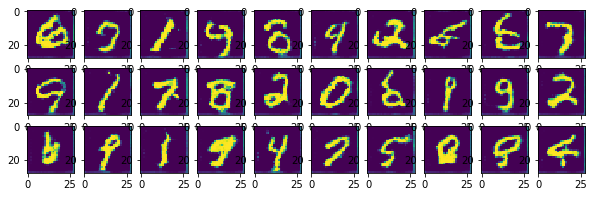

epoch: 70 	 last batch loss D: 1.3799574375152588 	 last batch loss G: 0.674875020980835


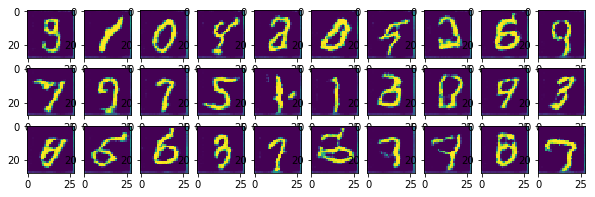

epoch: 71 	 last batch loss D: 1.396321177482605 	 last batch loss G: 0.6821006536483765


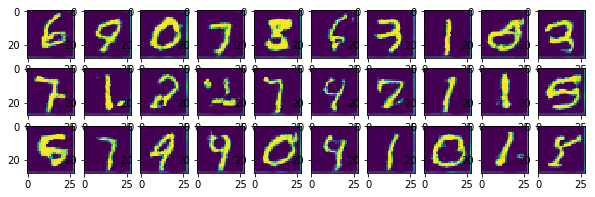

epoch: 72 	 last batch loss D: 1.394162893295288 	 last batch loss G: 0.6917564868927002


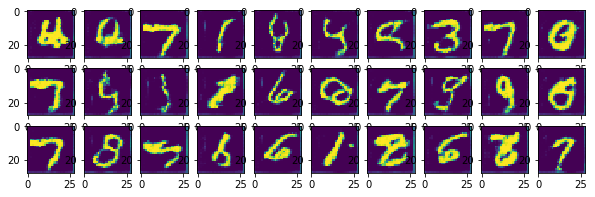

epoch: 73 	 last batch loss D: 1.3916966915130615 	 last batch loss G: 0.6897341012954712


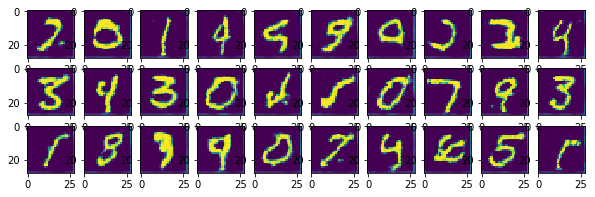

epoch: 74 	 last batch loss D: 1.3858078718185425 	 last batch loss G: 0.6948509216308594


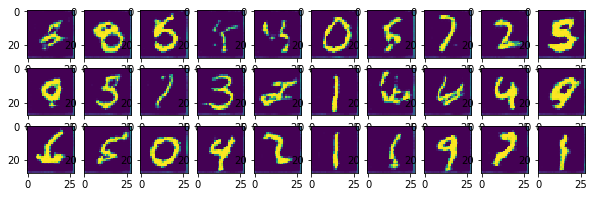

epoch: 75 	 last batch loss D: 1.3866822719573975 	 last batch loss G: 0.6881568431854248


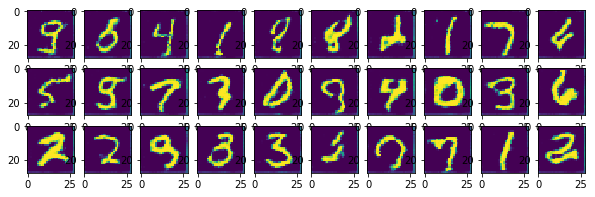

epoch: 76 	 last batch loss D: 1.382189393043518 	 last batch loss G: 0.7008407115936279


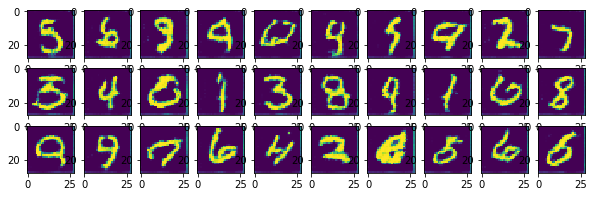

epoch: 77 	 last batch loss D: 1.3627896308898926 	 last batch loss G: 0.713018536567688


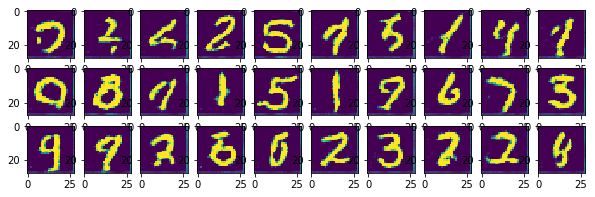

epoch: 78 	 last batch loss D: 1.3981131315231323 	 last batch loss G: 0.7221676111221313


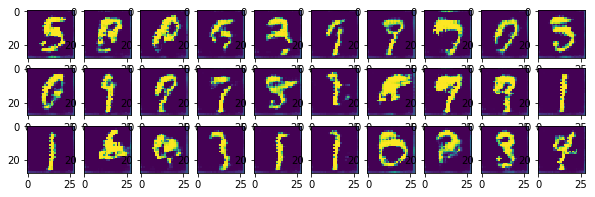

epoch: 79 	 last batch loss D: 1.2406480312347412 	 last batch loss G: 0.9284931421279907


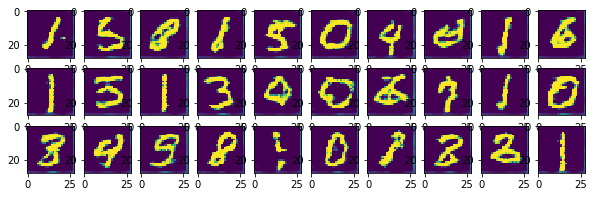

epoch: 80 	 last batch loss D: 1.3630914688110352 	 last batch loss G: 0.7012825012207031


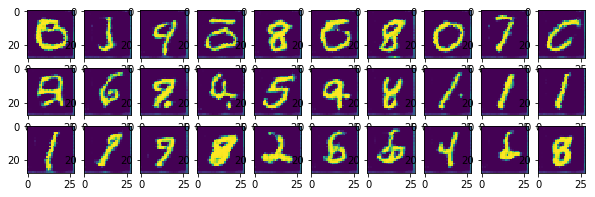

epoch: 81 	 last batch loss D: 1.3874168395996094 	 last batch loss G: 0.6928442716598511


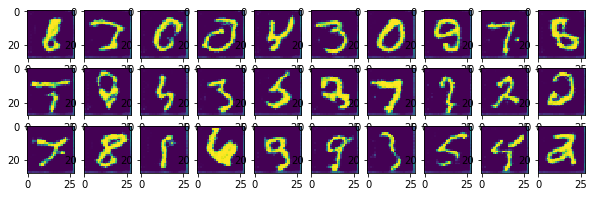

epoch: 82 	 last batch loss D: 1.3798108100891113 	 last batch loss G: 0.6945009231567383


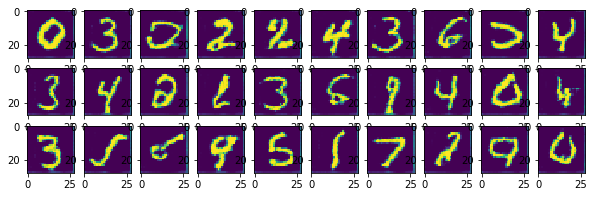

epoch: 83 	 last batch loss D: 1.3913854360580444 	 last batch loss G: 0.6938540935516357


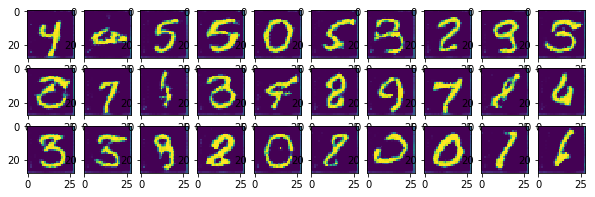

epoch: 84 	 last batch loss D: 1.3992493152618408 	 last batch loss G: 0.6900095343589783


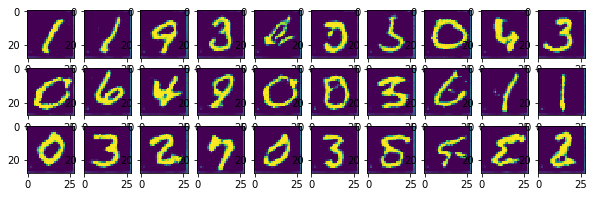

epoch: 85 	 last batch loss D: 1.3921051025390625 	 last batch loss G: 0.6983430981636047


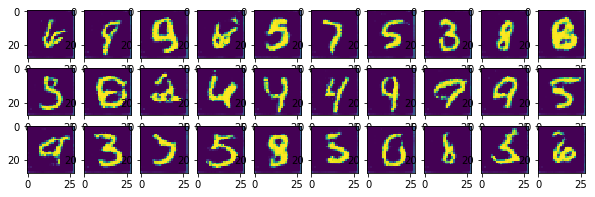

epoch: 86 	 last batch loss D: 1.3925093412399292 	 last batch loss G: 0.690809965133667


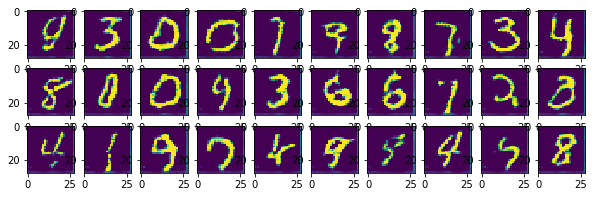

epoch: 87 	 last batch loss D: 1.3893401622772217 	 last batch loss G: 0.7002227306365967


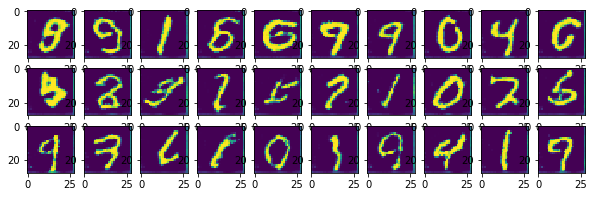

epoch: 88 	 last batch loss D: 1.3856678009033203 	 last batch loss G: 0.6952685117721558


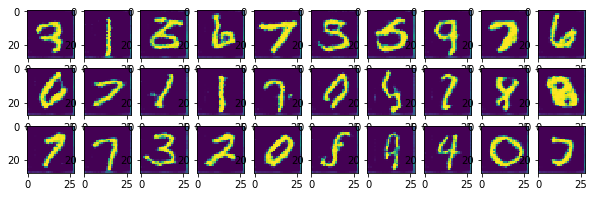

epoch: 89 	 last batch loss D: 1.3957523107528687 	 last batch loss G: 0.687438428401947


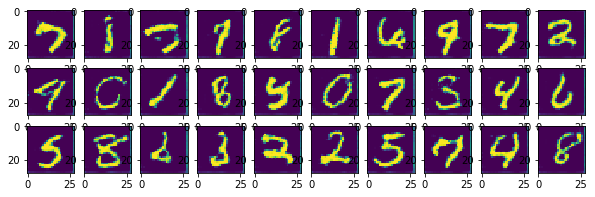

epoch: 90 	 last batch loss D: 1.3826383352279663 	 last batch loss G: 0.6967126727104187


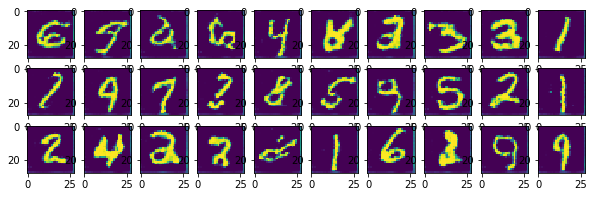

epoch: 91 	 last batch loss D: 1.3845065832138062 	 last batch loss G: 0.6889866590499878


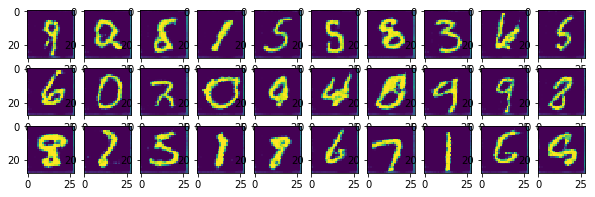

epoch: 92 	 last batch loss D: 1.393232822418213 	 last batch loss G: 0.683366596698761


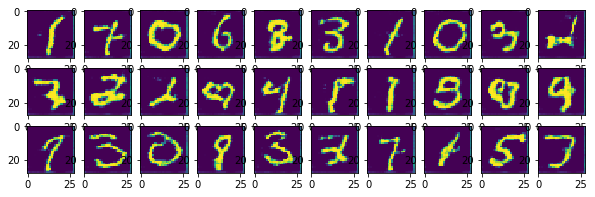

epoch: 93 	 last batch loss D: 1.3844436407089233 	 last batch loss G: 0.6909804940223694


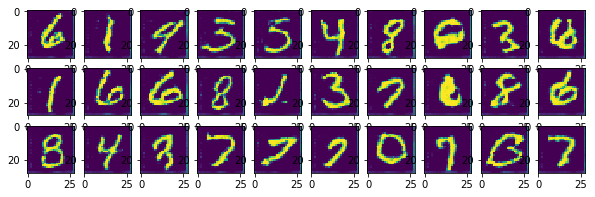

epoch: 94 	 last batch loss D: 1.3834048509597778 	 last batch loss G: 0.6912069320678711


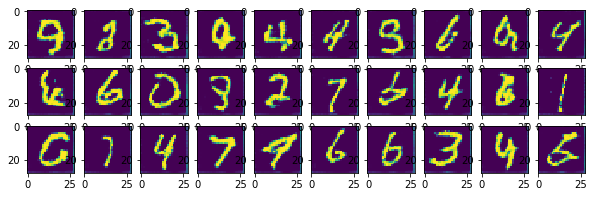

epoch: 95 	 last batch loss D: 1.3838119506835938 	 last batch loss G: 0.7124143838882446


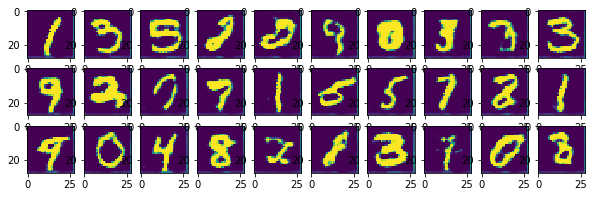

epoch: 96 	 last batch loss D: 1.395737648010254 	 last batch loss G: 0.6982694268226624


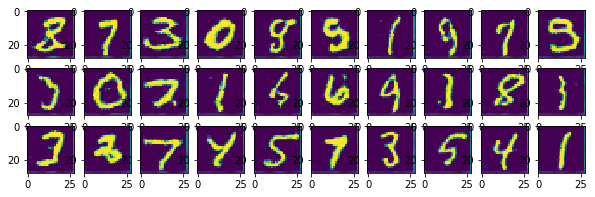

epoch: 97 	 last batch loss D: 1.3911423683166504 	 last batch loss G: 0.6965951919555664


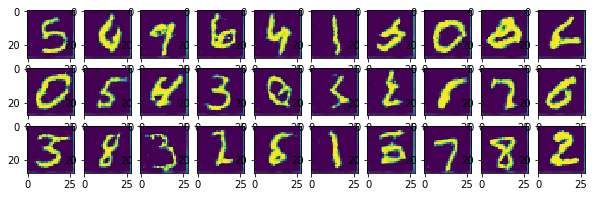

epoch: 98 	 last batch loss D: 1.3893747329711914 	 last batch loss G: 0.6996205449104309


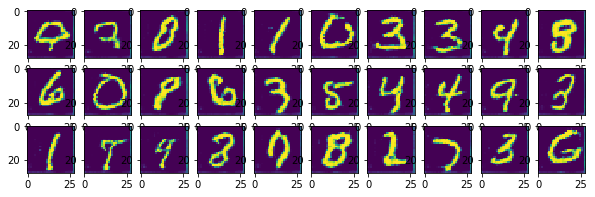

epoch: 99 	 last batch loss D: 1.382792353630066 	 last batch loss G: 0.6964408159255981


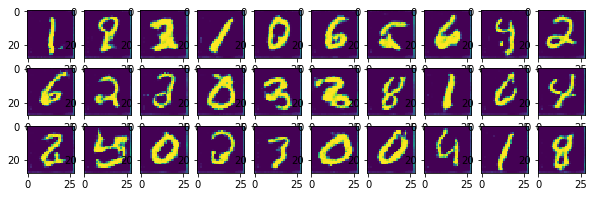

In [259]:
# [CHANGED] EPSILON is not needed anymore
# EPSILON = 1e-6

d_losses = []
g_losses = []

for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        fake_labels = torch.zeros(img.shape[0], 1).cuda()
        real_labels = torch.ones(img.shape[0], 1).cuda()

        #########################
        z = torch.randn(img.shape[0], 100)

        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        opt_D.zero_grad()
        # [CHANGED] BCE is more stable
        #         loss_d = -(torch.log(EPSILON + 1 - discriminator(fake_img.detach())) + 
        #                    torch.log(EPSILON + discriminator(real_img))).mean()
        loss_d = (F.binary_cross_entropy(discriminator(fake_img.detach()), fake_labels) +
                  F.binary_cross_entropy(discriminator(real_img), real_labels))
        loss_d.backward()
        opt_D.step()
        #########################
        
        z = torch.randn(img.shape[0], 100)
        
        if CUDA:
          z = z.cuda()
        fake_img = generator(z)

        opt_G.zero_grad()
        # [CHANGED] BCE is more stable
        #     loss_g = - torch.log(EPSILON + discriminator(fake_img)).mean()
        loss_g = F.binary_cross_entropy(discriminator(fake_img), real_labels)
        loss_g.backward()
        opt_G.step()
        #########################

    d_losses.append(loss_d.item())
    g_losses.append(loss_g.item())
    
    if epoch%1 == 0:
      print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))

      # [CHANGED] Better output
      for i in range(3):
          for j in range(10):
              plt.subplot(3, 10, i * 10 + j + 1)
              plt.imshow(fake_img[i * 10 + j].detach().cpu().view(28, 28).numpy())
      plt.show()


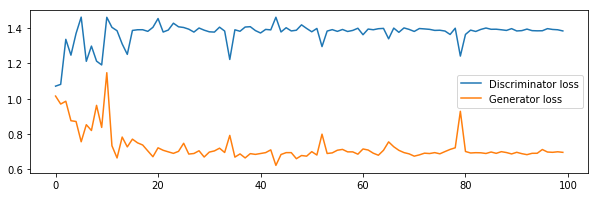

In [260]:
import matplotlib.pyplot as plt

plt.plot(d_losses, label='Discriminator loss')
plt.plot(g_losses, label='Generator loss')
plt.legend()
plt.show()